# Retraining polynomial regression with different random seeds

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## load and prepare data

In [2]:
data = pd.read_csv('CLEANED_sobolsampling-2048-2.csv')
#print(f'{data}')
data = data.drop(data.columns[0], axis=1)
#print(f'{data}')

X = data.drop('density', axis=1)
#print(f'{X}')

Y = data['density']
#print(f'{Y}')

## split data by using different random states

In [3]:
random_array = np.random.rand(30)*100
random_array = random_array.astype(int)
print(f'{random_array}')

[50 39 81 13 65 54 63 55 98 73 37  1 57 25 66 31 39 75 11 46 73 12 23  3
 57 12 34 50 77 97]


In [4]:
random_ints = [46, 40, 23, 29, 14, 78, 55, 33, 1, 61, 62, 39, 9, 25, 96, 95, 28, 27, 51, 0, 4, 39, 12, 41, 94, 70, 50, 18, 77, 37]
#print(f'{np.sort(random_ints)}')

In [5]:
X_TRAINs = []
X_TESTs = []
Y_TRAINs = []
Y_TESTs = []
for i in random_ints:
    #print(f'{i}')
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=i)
    X_TRAINs.append(X_train)
    X_TESTs.append(X_test)
    Y_TRAINs.append(Y_train)
    Y_TESTs.append(Y_test)


## create and train models

In [6]:
MODELs = []
Y_PREDICTIONs = []
RMSEs = []
R2s = []
SPEARMANRs = []
PVALUESs = []

for i in range(0, len(random_ints)):
    ## creation of the pipeline
    model = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    
    ## train/fit the model
    model.fit(X_TRAINs[i], Y_TRAINs[i])
    MODELs.append(model)
    
    ## prediction using the test set
    Y_prediction = model.predict(X_TESTs[i])
    Y_PREDICTIONs.append(Y_prediction)
    
    ## evaluate with Y_test
    rmse = np.sqrt(mean_squared_error(Y_TESTs[i], Y_prediction))
    r2 = r2_score(Y_TESTs[i], Y_prediction)
    spearman_r = stats.spearmanr(Y_TESTs[i], Y_prediction)

    RMSEs.append(rmse)
    R2s.append(r2)
    SPEARMANRs.append(spearman_r.statistic)
    PVALUESs.append(spearman_r.pvalue)
    #print(f'RMSE: {rmse}')
    #print(f'R2: {r2}')

## plot RMSEs and R2s

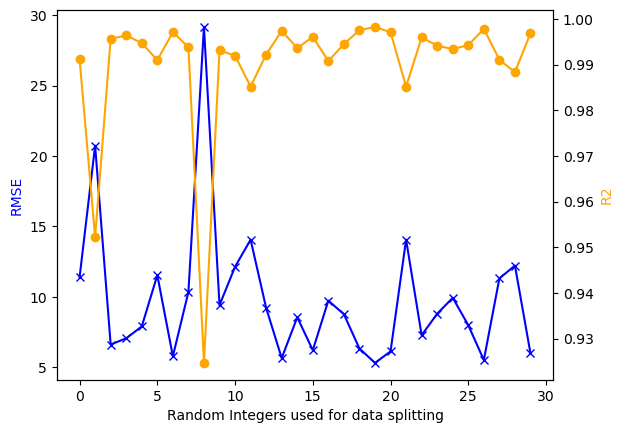

In [7]:
fig, ax1 = plt.subplots()
ax1.plot(RMSEs, '-x', color='blue', label='RMSE')
ax1.set_xlabel('Random Integers used for data splitting')
ax1.set_ylabel('RMSE', color='blue')

ax2 = ax1.twinx()
ax2.plot(R2s, '-o', color='orange', label='R2')
ax2.set_ylabel('R2', color='orange')

#plt.legend()
plt.show()
fig.savefig('Training_with_different_randomseeds_for_data_splits.png')

## means of RMSE and R2 and SpearmanR

In [8]:
print(f'avg. RMSE: {np.mean(RMSEs)}')
print(f'Std Dev: {np.std(RMSEs)}')
#print(f'Variance: {np.var(RMSEs)}')

avg. RMSE: 9.83860565239528
Std Dev: 4.86652664176868


In [9]:
print(f'avg. R2: {np.mean(R2s)}')
print(f'Std Dev: {np.std(R2s)}')
#print(f'Variance: {np.var(R2s)}')

avg. R2: 0.9900567082269224
Std Dev: 0.014621954966956592


In [10]:
print(f'avg. R2: {np.mean(SPEARMANRs)}')
print(f'Std Dev: {np.std(SPEARMANRs)}')
#print(f'Variance: {np.var(SPEARMANRs)}')

avg. R2: 0.9891944965565742
Std Dev: 0.008877859491235502


## Test models for previous optimization results

In [12]:
Y_PREDICTIONS_OPT = []


opt = pd.DataFrame(data={'SigC': [0.3286], 'SigH': [0.2606], 'EpsC': [0.6730], 'EpsH': [0.1194], 'density': [707.0]})
x_opt = opt.drop('density', axis=1)
y_opt = opt['density']

#print(f'{X_TESTs[0]}')
print(f'{x_opt}')
print(f'{y_opt}')

for model in MODELs:
    y_pred = model.predict(x_opt)
    #print(f'{y_pred}')
    Y_PREDICTIONS_OPT.append(y_pred)

    rmse = np.sqrt(mean_squared_error(y_opt, y_pred))
    #print(f'rmse: {rmse}')
    #print(f'rel. error: {(rmse/707.0)*100}%')
    #print(f'{(rmse/707.0)*100}%')
    #print(f'')

     SigC    SigH   EpsC    EpsH
0  0.3286  0.2606  0.673  0.1194
0    707.0
Name: density, dtype: float64


In [13]:
for y in Y_PREDICTIONS_OPT:
    print(f'{y}')


[730.47283966]
[727.06096909]
[731.65625]
[731.41698326]
[730.78626291]
[731.67119295]
[730.2654845]
[730.1070544]
[723.25]
[732.18216979]
[730.95596314]
[729.96881963]
[731.91549738]
[731.05989302]
[732.29426029]
[732.0386444]
[731.38980278]
[731.47249116]
[730.44428767]
[730.61808506]
[731.03117157]
[729.96881963]
[730.60812109]
[730.88423398]
[731.35033531]
[731.1790881]
[730.77629903]
[725.8125]
[729.8746394]
[731.91688602]
